# GHCN data
Reading in and working with GHCN (GLobal Historical Climate Network) data

see https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/global-historical-climatology-network-ghcn

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn import linear_model

In [10]:
from tqdm import tqdm

In [1]:
%load_ext autoreload
%autoreload 2
import src.ghcn as ghcn

In [9]:
%%time
stations_df = ghcn.get_stations()

CPU times: user 1.32 s, sys: 54.3 ms, total: 1.38 s
Wall time: 2.6 s


In [10]:
stations_df.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
0,ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
1,ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
2,AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
3,AEM00041194,25.2550,55.3640,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0
4,AEM00041217,24.4330,54.6510,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0


In [11]:
len(stations_df)

115081

In [12]:
stations_df.STATE.value_counts()

TX    5037
CO    4176
CA    2798
NC    2159
NE    2090
      ... 
MP      11
UM      11
PW      11
SA       1
PI       1
Name: STATE, Length: 76, dtype: int64

In [8]:
stations_df[stations_df.STATE == "NY"].head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
75552,US1NYAB0001,42.6670,-74.0509,445.0,NY,ALTAMONT 2.7 SSW,NaN,NaN,NaN
75553,US1NYAB0006,42.7198,-73.9304,88.7,NY,SCHENECTADY 5.6 SSW,NaN,NaN,NaN
75554,US1NYAB0010,42.5455,-74.1475,488.3,NY,RENSSELAERVILLE 2.1 NNW,NaN,NaN,NaN
75555,US1NYAB0016,42.7590,-73.7370,104.2,NY,LATHAM 1.1 NNE,NaN,NaN,NaN
75556,US1NYAB0017,42.6678,-73.7856,65.5,NY,ALBANY 0.7 E,NaN,NaN,NaN


In [9]:
stations_df[(stations_df.STATE == "NY") & (pd.notnull(stations_df["GSN FLAG"]))]

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSN FLAG,HCN/CRN FLAG,WMO ID
113151,USW00014771,43.1111,-76.1039,125.9,NY,SYRACUSE HANCOCK INTL AP,GSN,HCN,72519.0


In [13]:
len(stations_df[pd.notnull(stations_df["GSN FLAG"])])

991

In [15]:
readme = get_ghcn_file("readme.txt")

In [8]:
[(i, j) for i in ["A", "B", "C"] for j in ["1", "2", "3"]]

[('A', '1'),
 ('A', '2'),
 ('A', '3'),
 ('B', '1'),
 ('B', '2'),
 ('B', '3'),
 ('C', '1'),
 ('C', '2'),
 ('C', '3')]

In [16]:
print(readme)

README FILE FOR DAILY GLOBAL HISTORICAL CLIMATOLOGY NETWORK (GHCN-DAILY) 
Version 3.26

--------------------------------------------------------------------------------
How to cite:

Note that the GHCN-Daily dataset itself now has a DOI (Digital Object Identifier)
so it may be relevant to cite both the methods/overview journal article as well 
as the specific version of the dataset used.

The journal article describing GHCN-Daily is:
Menne, M.J., I. Durre, R.S. Vose, B.E. Gleason, and T.G. Houston, 2012:  An overview 
of the Global Historical Climatology Network-Daily Database.  Journal of Atmospheric 
and Oceanic Technology, 29, 897-910, doi:10.1175/JTECH-D-11-00103.1.

To acknowledge the specific version of the dataset used, please cite:
Menne, M.J., I. Durre, B. Korzeniewski, S. McNeal, K. Thomas, X. Yin, S. Anthony, R. Ray, 
R.S. Vose, B.E.Gleason, and T.G. Houston, 2012: Global Historical Climatology Network - 
Daily (GHCN-Daily), Version 3. [indicate subset used following decimal

In [11]:
%%time
test_dly = ghcn.get_ghcn_file("all/USW00014771.dly")

CPU times: user 163 ms, sys: 18.9 ms, total: 182 ms
Wall time: 1.02 s


In [12]:
print(test_dly[:1000])

USW00014771193805TMAX  194  0  200  0  183  0  217  0  272  0  217  0  172  0  150  0  139  0  117  0   94  0  106  0  122  0  189  0  106  0  194  0  206  0  228  0  178  0  267  0  194  0  211  0  222  0  200  0  183  0  222  0  261  0  261  0  244  0  233  0  233  0
USW00014771193805TMIN   39  0   78  0   89  0   22  0   61  0  144  0   89  0   67  0   28  0   61  0   44  0   11  0   39  0   17  0   67  0   67  0   72  0   61  0  111  0  144  0   94  0   94  0   83  0   94  0   22  0   78  0  111  0  100  0   94  0   89  0   83  0
USW00014771193805PRCP   36  0    0  0    0  0    0T 0    0  0   51  0    0  0    0  0    0  0   41  0   20  0    0T 0   38  0   33  0  188  0   76  0    0  0    0  0    0  0   51  0    3  0   13  0    0  0   33  0   53  0    0  0    0  0    0  0    0  0   28  0    0  0
USW00014771193805SNOW    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0T 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0    0P 0 

In [9]:
%%time
test_dly_df = ghcn.get_station_data(station_id="USW00014771")

CPU times: user 1.61 s, sys: 67.4 ms, total: 1.68 s
Wall time: 2.72 s


In [12]:
len(test_dly_df)

16114

In [13]:
test_dly_df.sort_values("YEAR", ascending = False).head()

,ID,YEAR,MONTH,ELEMENT,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,...,SFLAG22,SFLAG23,SFLAG24,SFLAG25,SFLAG26,SFLAG27,SFLAG28,SFLAG29,SFLAG30,SFLAG31
16113,USW00014771,2020,1,WT09,-9999,-9999,-9999,-9999,-9999,-9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16106,USW00014771,2020,1,PGTM,-9999,-9999,-9999,-9999,-9999,-9999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16100,USW00014771,2020,1,TMAX,17,106,100,56,6,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16101,USW00014771,2020,1,TMIN,-22,-28,56,6,-11,-11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16103,USW00014771,2020,1,SNOW,0,0,0,0,20,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
temps = ghcn.get_temps(test_dly_df)

In [80]:
temps.head()

,ID,YEAR,MONTH,ELEMENT,var,temp_c,day,temp_f,date
0,USW00014771,1938,5,TMAX,VALUE1,194,1,66.92,1938-05-01
1,USW00014771,1938,5,TMIN,VALUE1,39,1,39.02,1938-05-01
2,USW00014771,1938,6,TMAX,VALUE1,261,1,78.98,1938-06-01
3,USW00014771,1938,6,TMIN,VALUE1,89,1,48.02,1938-06-01
4,USW00014771,1938,7,TMAX,VALUE1,211,1,69.98,1938-07-01


In [81]:
len(temps)

59661

In [82]:
high_temps = temps[temps.ELEMENT == "TMAX"].sort_values("date")
low_temps = temps[temps.ELEMENT == "TMIN"].sort_values("date")

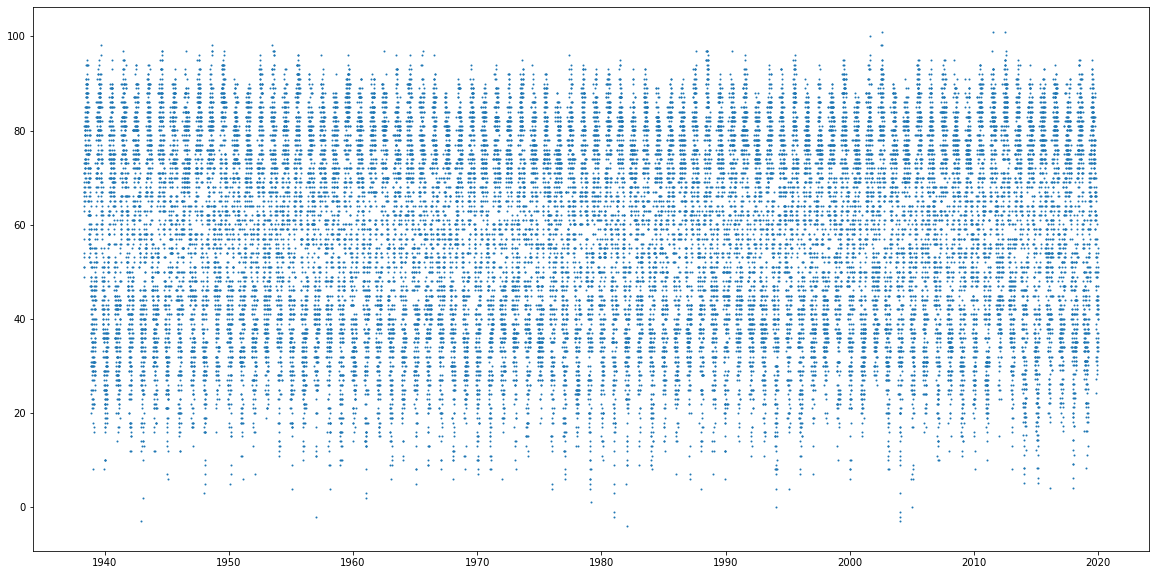

In [83]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.scatter(high_temps["date"], high_temps.temp_f, label = "high", s = 1)
# ax.scatter(low_temps["date"], low_temps.temp_f, label = "low")

lin reg?

In [84]:
high_temps["day_num"] = high_temps["date"].rank()

In [85]:
high_temps.head()

,ID,YEAR,MONTH,ELEMENT,var,temp_c,day,temp_f,date,day_num
0,USW00014771,1938,5,TMAX,VALUE1,194,1,66.92,1938-05-01,1.0
1962,USW00014771,1938,5,TMAX,VALUE2,200,2,68.00,1938-05-02,2.0
3924,USW00014771,1938,5,TMAX,VALUE3,183,3,64.94,1938-05-03,3.0
5886,USW00014771,1938,5,TMAX,VALUE4,217,4,71.06,1938-05-04,4.0
7848,USW00014771,1938,5,TMAX,VALUE5,272,5,80.96,1938-05-05,5.0


In [86]:
lm = linear_model.LinearRegression()

In [87]:
model = lm.fit(high_temps[["day_num"]],high_temps.temp_f)

In [88]:
high_temps["lin_reg"] = model.predict(high_temps[["day_num"]])

In [89]:
low_temps["day_num"] = low_temps["date"].rank()
low_temps["lin_reg"] = lm.fit(low_temps[["day_num"]], low_temps.temp_f).predict(low_temps[["day_num"]])

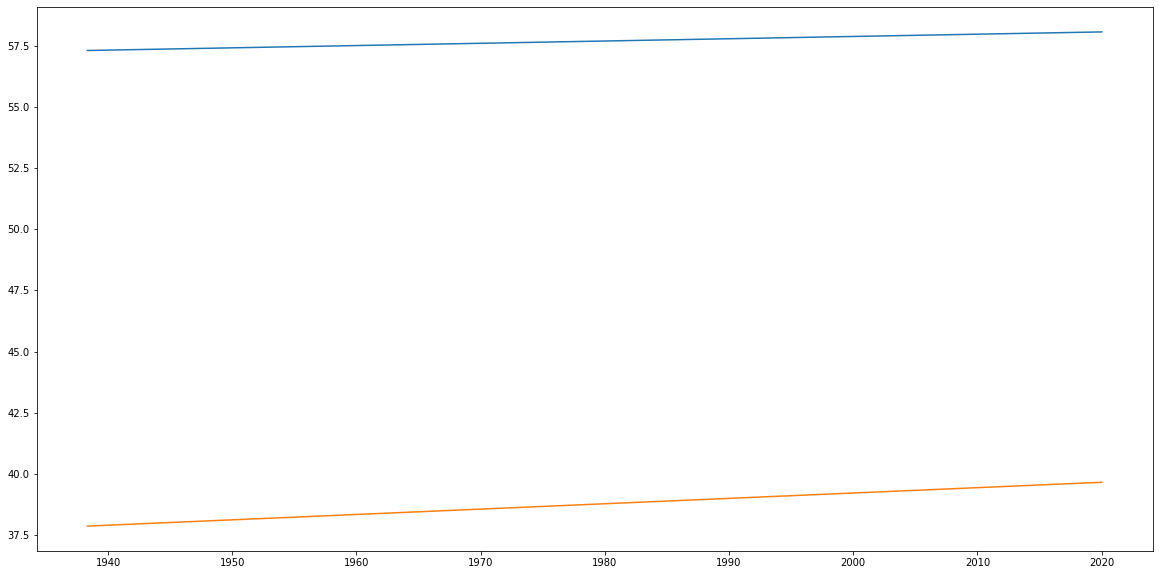

In [90]:
fig, ax = plt.subplots(figsize = (20, 10))
# ax.scatter(high_temps["date"], high_temps.temp_f, label = "high", s = 1)
ax.plot(high_temps["date"], high_temps.lin_reg, label = "high")
ax.plot(low_temps["date"], low_temps.lin_reg, label = "low")

#### Get all GCN temp data

In [20]:
full_temp_data = ghcn.get_all_temps(limit = None, use_tqdm = True)

100%|██████████| 991/991 [18:50<00:00,  1.14s/it]


In [21]:
len(full_temp_data)

37122601

In [22]:
full_temp_data.head()

,ID,YEAR,MONTH,ELEMENT,var,temp_c,day,temp_f,date
2,AE000041196,1944,4,TMAX,VALUE1,258,1,78.44,1944-04-01
3,AE000041196,1944,4,TMIN,VALUE1,180,1,64.40,1944-04-01
4,AE000041196,1944,5,TMAX,VALUE1,335,1,92.30,1944-05-01
5,AE000041196,1944,5,TMIN,VALUE1,180,1,64.40,1944-05-01
6,AE000041196,1944,6,TMAX,VALUE1,374,1,99.32,1944-06-01


In [23]:
%%time
full_temp_data.to_csv("./../data/ghcn_temps.csv")

CPU times: user 7min 44s, sys: 1.56 s, total: 7min 45s
Wall time: 6h 33min 15s
